In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
loan= pd.read_csv('loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## Looking at the missing values

In [3]:
loan.isnull().sum()

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_status        2227612
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
Length: 145, dtype: int64

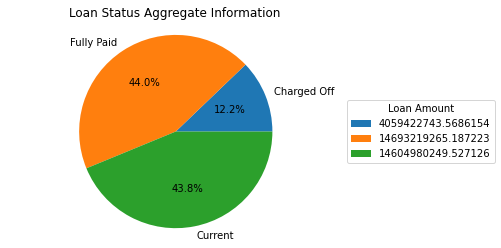

In [4]:
# plotting pie chart for different types of loan_status
chargedOffLoans = loan.loc[(loan["loan_status"] == "Charged Off")]
currentLoans = loan.loc[(loan["loan_status"] == "Current")]
fullyPaidLoans = loan.loc[(loan["loan_status"]== "Fully Paid")]

data  = [{"Charged Off": chargedOffLoans["funded_amnt_inv"].sum(), "Fully Paid":fullyPaidLoans["funded_amnt_inv"].sum(), "Current":currentLoans["funded_amnt_inv"].sum()}]
investment_sum = pd.DataFrame(data) 
chargedOffTotalSum = float(investment_sum["Charged Off"])
fullyPaidTotalSum = float(investment_sum["Fully Paid"])
currentTotalSum = float(investment_sum["Current"])
loan_status = [chargedOffTotalSum,fullyPaidTotalSum,currentTotalSum]
loan_status_labels = 'Charged Off','Fully Paid','Current'
plt.pie(loan_status,labels=loan_status_labels,autopct='%1.1f%%')
plt.title('Loan Status Aggregate Information')
plt.axis('equal')
plt.legend(loan_status,title="Loan Amount",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

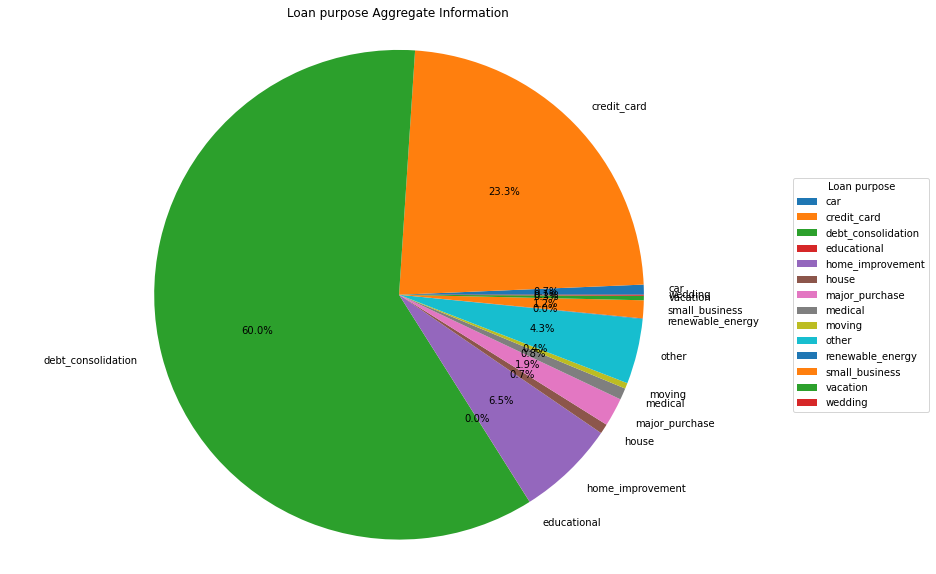

In [5]:
# plotting pie chart for different types of purpose
loans_purpose = loan.groupby(['purpose'])['funded_amnt_inv'].sum().reset_index()
plt.figure(figsize=(14, 10))
plt.pie(loans_purpose["funded_amnt_inv"],labels=loans_purpose["purpose"],autopct='%1.1f%%')
plt.title('Loan purpose Aggregate Information')
plt.axis('equal')
plt.legend(loans_purpose["purpose"],title="Loan purpose",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Cleaning the missing Data

In [6]:
# in dataset, we can see around half of the columns are null
# completely, hence remove all columns having no values
loan = loan.dropna(axis=1, how="all")
print("Looking into remaining columns info:")
print(loan.info(max_cols=200))

Looking into remaining columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 142 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   loan_amnt                                   int64  
 1   funded_amnt                                 int64  
 2   funded_amnt_inv                             float64
 3   term                                        object 
 4   int_rate                                    float64
 5   installment                                 float64
 6   grade                                       object 
 7   sub_grade                                   object 
 8   emp_title                                   object 
 9   emp_length                                  object 
 10  home_ownership                              object 
 11  annual_inc                                  float64
 12  verification_status                         ob

None


Now Removing all the <b> Demographic and Customer Behavioural </b> features which is of no use for default analysis

In [13]:
# remove non-required columns
# id - not required
# member_id - not required
# acc_now_delinq - empty
# fundedAmnt - not useful, funded_amnt_inv is useful which is funded to person
# emp_title - brand names not useful
# pymnt_plan - fixed value as n for all**
# url - not useful
# desc - can be applied some NLP but not for EDA
# title - too many distinct values not useful
# zip_code - complete zip is not available
# delinq_2yrs - post approval feature
# mthsSinceLastDelinq - only half values are there, not much information
# mthsSinceLastRecord - only 10% values are there
# revolBal - post/behavioural feature
# initialListStatus - fixed value as f for all
# out_prncp - post approval feature
# out_prncp_inv - not useful as its for investors
# total_pymnt - post approval feature
# total_pymnt_inv - not useful as it is for investors
# total_rec_prncp - post approval feature
# total_rec_int - post approval feature
# total_rec_late_fee - post approval feature
# recoveries - post approval feature
# collection_recovery_fee - post approval feature
# last_pymnt_d - post approval feature
# last_credit_pull_d - irrelevant for approval
# last_pymnt_amnt - post feature
# next_pymnt_d - post feature
# collections_12_mths_ex_med - only 1 value 
# policy_code - only 1 value
# acc_now_delinq - single valued
# chargeoff_within_12_mths - post feature
# delinq_amnt - single valued
# tax_liens - single valued
# application_type - single
# pub_rec_bankruptcies - single valued for more than 99%
# addrState - may not depend on location as its in financial domain

colsToDrop = [ "funded_amnt", "emp_title", "pymnt_plan", "desc", "title", "zip_code", "delinq_2yrs", "mths_since_last_delinq", "mths_since_last_record", "revol_bal", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "application_type", "pub_rec_bankruptcies", "addr_state"]
loan.drop(colsToDrop, axis=1, inplace=True)
print("Features we are left with",list(loan.columns))


Features we are left with ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_

In [16]:
colstokeep = ["loan_amnt", "funded_amnt_inv", "term", "int_rate", "installment", "grade", "sub_grade", "emp_length","home_ownership", "annual_inc", "verification_status", "issue_d", "loan_status", "purpose", "dti", "earliest_cr_line", "inq_last_6mths", "open_acc", "pub_rec", "revol_util", "total_acc"]
loan = loan.loc[:, loan.columns.intersection(colstokeep)]


In [17]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,2500,2500.0,36 months,13.56,84.92,C,C1,10+ years,RENT,55000.0,...,Dec-2018,Current,debt_consolidation,18.24,Apr-2001,1.0,9.0,1.0,10.3,34.0
1,30000,30000.0,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,90000.0,...,Dec-2018,Current,debt_consolidation,26.52,Jun-1987,0.0,13.0,1.0,24.2,44.0
2,5000,5000.0,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,59280.0,...,Dec-2018,Current,debt_consolidation,10.51,Apr-2011,0.0,8.0,0.0,19.1,13.0
3,4000,4000.0,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,92000.0,...,Dec-2018,Current,debt_consolidation,16.74,Feb-2006,0.0,10.0,0.0,78.1,13.0
4,30000,30000.0,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,57250.0,...,Dec-2018,Current,debt_consolidation,26.35,Dec-2000,0.0,12.0,0.0,3.6,26.0


In [18]:
# in 12 unique values we have 10+ years the most for emp_length, 
# but it is highly dependent variable so we will not impute
# but remove the rows with null values which is around 2.5%
loan.dropna(axis=0, subset=["emp_length"], inplace=True)
# remove NA rows for revol_util as its dependent and is around 0.1%
loan.dropna(axis=0, subset=["revol_util"], inplace=True)

Standardize Some feature columns 


In [22]:
# update int_rate, revol_util without % sign and as numeric type
loan["term"] = pd.to_numeric(loan["term"].apply(lambda x:x.split()[0]))

Removing records with loan status as “Current”, as the loan is currently running and we can’t infer any information regarding default from such loans.

In [23]:
# remove the rows with loan_status as "Current"
loan = loan[loan["loan_status"].apply(lambda x:False if x == "Current" else True)]

# update loan_status as Fully Paid to 0 and Charged Off to 1
loan["loan_status"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

# update emp_length feature with continuous values as int
# where (< 1 year) is assumed as 0 and 10+ years is assumed as 10 and rest are stored as their magnitude
loan["emp_length"] = pd.to_numeric(loan["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

# look through the purpose value counts
loan_purpose_values = loan["purpose"].value_counts()*100/loan.shape[0]

# remove rows with less than 1% of value counts in paricular purpose 
loan_purpose_delete = loan_purpose_values[loan_purpose_values<1].index.values
loan = loan[[False if p in loan_purpose_delete else True for p in loan["purpose"]]]

In [1]:
plt.subplot(2,2,1)
plt.title('Annual Inc')

sns.boxplot(x=loan['annual_inc'])

plt.subplot(2,2,2)
plt.title('Open Acc')
sns.boxplot(x=loan['open_acc'])

plt.subplot(2,2,3)
plt.title('Total Acc')
sns.boxplot(x=loan['total_acc'])

plt.subplot(2,2,4)
plt.title('Public Record')
sns.boxplot(x=loan['pub_rec'])



NameError: name 'plt' is not defined

In [ ]:
# for annual_inc, the highest value is 6000000 where 75% quantile value is 83000, and is 100 times the mean
# we need to remomve outliers from annual_inc i.e. 99 to 100%
annual_inc_q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < annual_inc_q]
# for open_acc, the highest value is 44 where 75% quantile value is 12, and is 5 times the mean
# we need to remomve outliers from open_acc i.e. 99.9 to 100%
open_acc_q = loan["open_acc"].quantile(0.999)
loan = loan[loan["open_acc"] < open_acc_q]
# for total_acc, the highest value is 90 where 75% quantile value is 29, and is 4 times the mean
# we need to remomve outliers from total_acc i.e. 98 to 100%
total_acc_q = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_q]
# for pub_rec, the highest value is 4 where 75% quantile value is 0, and is 4 times the mean
# we need to remomve outliers from pub_rec i.e. 99.5 to 100%
pub_rec_q = loan["pub_rec"].quantile(0.995)
loan = loan[loan["pub_rec"] <= pub_rec_q]

In [31]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
100,30000,30000.0,36,22.35,1151.16,D,D5,5,MORTGAGE,100000.0,...,Dec-2018,0,debt_consolidation,30.46,Jan-2012,0.0,11.0,1.0,37.0,19.0
152,40000,40000.0,60,16.14,975.71,C,C4,0,MORTGAGE,45000.0,...,Dec-2018,0,credit_card,50.53,Jun-2009,0.0,18.0,0.0,64.5,37.0
170,20000,20000.0,36,7.56,622.68,A,A3,10,MORTGAGE,100000.0,...,Dec-2018,0,credit_card,18.92,Feb-1999,0.0,9.0,0.0,29.9,19.0
186,4500,4500.0,36,11.31,147.99,B,B3,10,RENT,38500.0,...,Dec-2018,0,credit_card,4.64,Dec-2003,0.0,12.0,0.0,15.3,25.0
269,20000,20000.0,60,17.97,507.55,D,D1,4,RENT,57000.0,...,Dec-2018,0,debt_consolidation,22.18,Apr-1995,0.0,10.0,0.0,45.9,16.0


## Binning Continuous Data

In [35]:
# create bins for loan_amnt range
bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_l)
# create bins for int_rate range
bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bucket_l)
# create bins for annual_inc range
bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_l)
# create bins for installment range
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

loan['installment'] = loan['installment'].apply(lambda x: installment(x))
# create bins for dti range
bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=bucket_l)

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190903 entries, 100 to 2260664
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   loan_amnt            1190903 non-null  int64   
 1   funded_amnt_inv      1190903 non-null  float64 
 2   term                 1190903 non-null  int64   
 3   int_rate             1190903 non-null  float64 
 4   installment          1190903 non-null  object  
 5   grade                1190903 non-null  object  
 6   sub_grade            1190903 non-null  object  
 7   emp_length           1190903 non-null  int64   
 8   home_ownership       1190903 non-null  object  
 9   annual_inc           1190903 non-null  float64 
 10  verification_status  1190903 non-null  object  
 11  issue_d              1190903 non-null  object  
 12  loan_status          1190903 non-null  int64   
 13  purpose              1190903 non-null  object  
 14  dti                  1190886 non

## Visualizing Data 

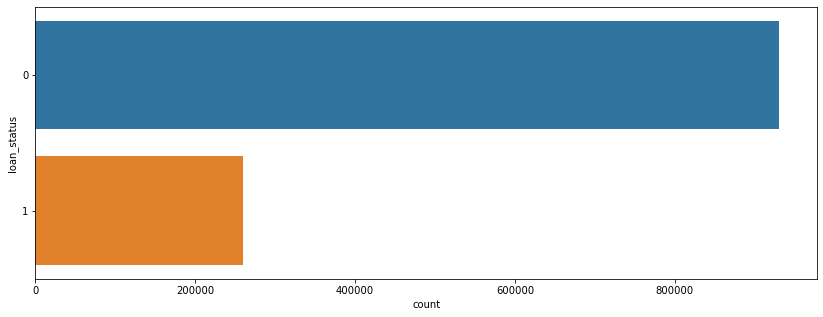

percentage of defaulters  21.818149756949136 %


In [42]:
# check for amount of defaults in the data using countplot
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status", data=loan)
plt.show()
print('percentage of defaulters ',(loan['loan_status'].sum())/loan['loan_status'].count()*100, '%')

## Univariate Analysis

In [43]:
# function for plotting the count plot features wrt default ratio
def plotUnivariateRatioBar(feature, data=loan, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status"]==1])
        feature_values.append(feature_count*100/feature_filter["loan_status"].count())
    plt.bar(feature_dimension, feature_values, color='orange', edgecolor='white')
    plt.title("Loan Defaults wrt "+str(feature)+" feature - countplot")
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("defaulter %", fontsize=16)
    plt.show()
# function to plot univariate with default status scale 0 - 1
def plotUnivariateBar(x, figsize=(10,5)):
    plt.figure(figsize=figsize)
    sns.barplot(x=x, y='loan_status', data=loan)
    plt.title("Loan Defaults wrt "+str(x)+" feature - countplot")
    plt.xlabel(x, fontsize=16)
    plt.ylabel("defaulter ratio", fontsize=16)
    plt.show()

## Categoriacal variables 

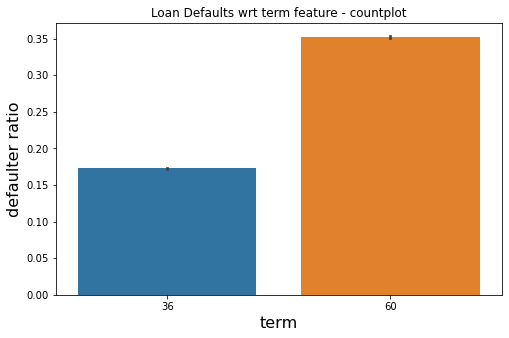

In [44]:
# check for defaulters wrt term in the data using countplot
plotUnivariateBar("term", figsize=(8,5))

We can see that the defaulting probabaility is higher as we increase the <b>Term</b>, evident in the above plot 
### is term important -->yes

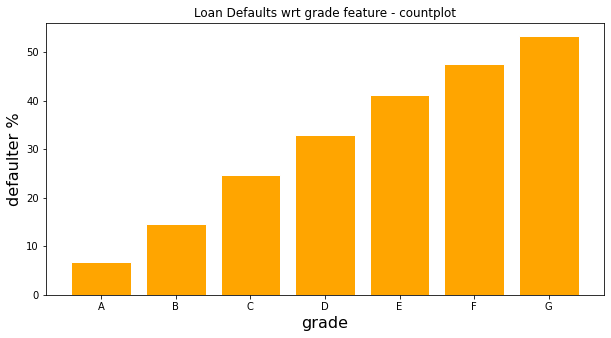

In [45]:
# check for defaulters wrt grade in the data using countplot
plotUnivariateRatioBar("grade")

AS expected the default probability increases as <b>grade</b> increases, key metric to note is the high difference betweent the A and B grade and realtively lower differnce as we go to G 
### Is grade important --> absolutely yes

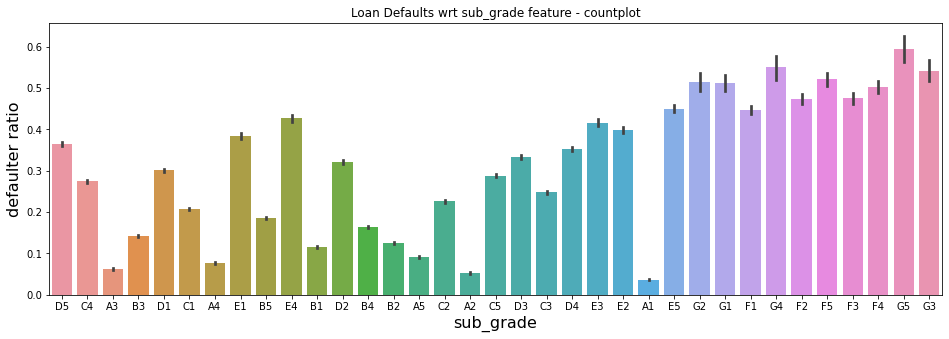

In [46]:
# check for defaulters wrt sub_grade in the data using countplot
plotUnivariateBar("sub_grade", figsize=(16,5))


From above plot for <b>‘sub_grade’</b> we can infer that the defaulters rate is increasing wrt sub_grade, hence the chances of loan getting deaulted increases with the sub_grade from A1 moving towards G5.

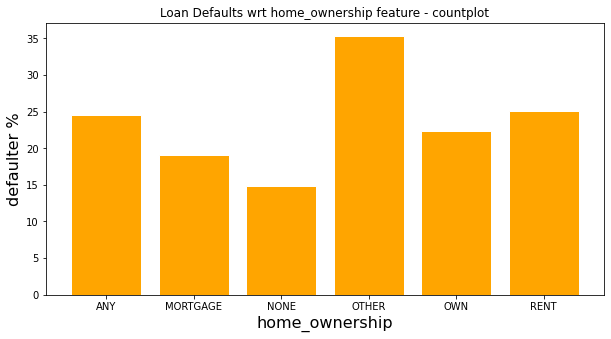

In [50]:
# check for defaulters wrt home_ownership in the data 
plotUnivariateRatioBar("home_ownership")

From above plot for ‘home_ownership’ we can infer that the defaulters rate is constant here (it is quite more for OTHERS but we dont know what is in there, so we’ll not consider it for analysis), hence defaulter does not depends on home_ownership
### Is home ownership a valuable metric --> No

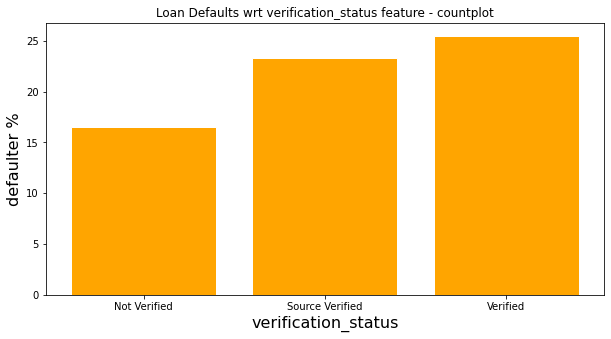

In [51]:
# check for defaulters wrt verification_status in the data
plotUnivariateRatioBar("verification_status")

This is a little non intuitive that verified sources are more likely to default and non verified are less likely to default
Giving this metric a <b>benefit of doubt</b> we can ignore its impact on analysis 
### Is verification status a valuable metric--> No

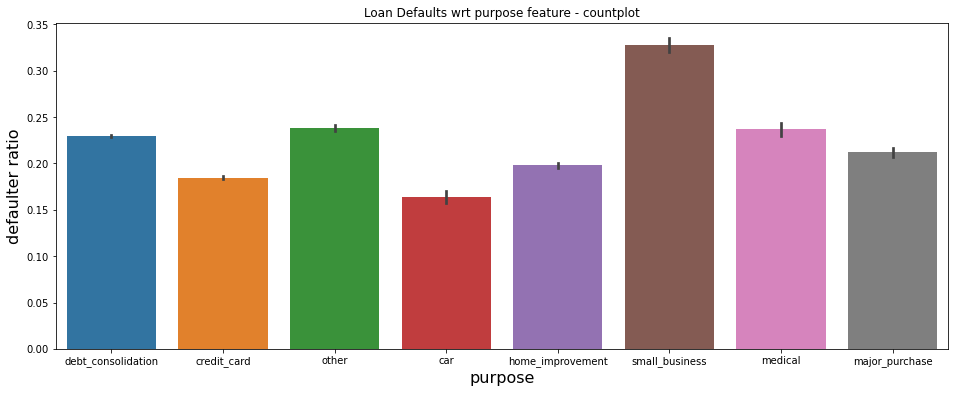

In [52]:
# check for defaulters wrt purpose in the data using countplot
plotUnivariateBar("purpose", figsize=(16,6))

From above plot for <b>‘purpose’</b> we can infer that the defaulters rate is nearly constant for all purpose type except ‘small business’, hence rate will depend on purpose of the loan
### Is purpose Beneficial -->yes


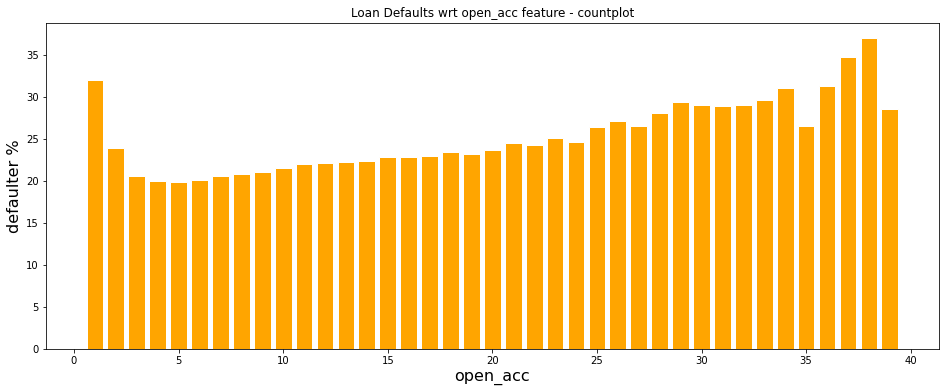

In [54]:
#check for defaulters wrt open_acc in the data using countplot
plotUnivariateRatioBar("open_acc", figsize=(16,6))

From above plot for <b>‘open_acc’</b> we can infer that the defaulters rate is nearly constant for feature open_acc, hence rate will not depend on open_acc feature
### is open_acc benificial -> No

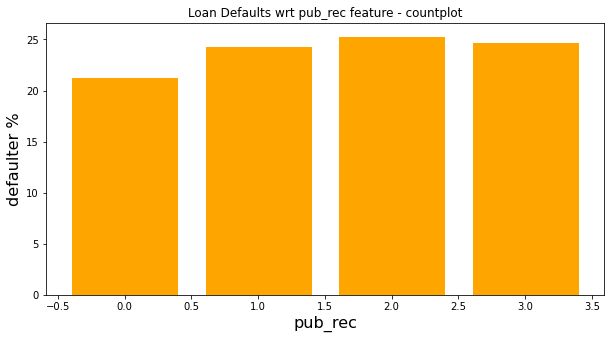

In [55]:
# check for defaulters wrt pub_rec in the data using countplot
plotUnivariateRatioBar("pub_rec")

A very non intuitive deduciton but according to the data provided to us, the public record cant clearly define if a person will default a not, though no public record does reduce the defaault rate but still doesnt convey clear insight
### is pub_rec benificial --> No

## Continuous Variable 

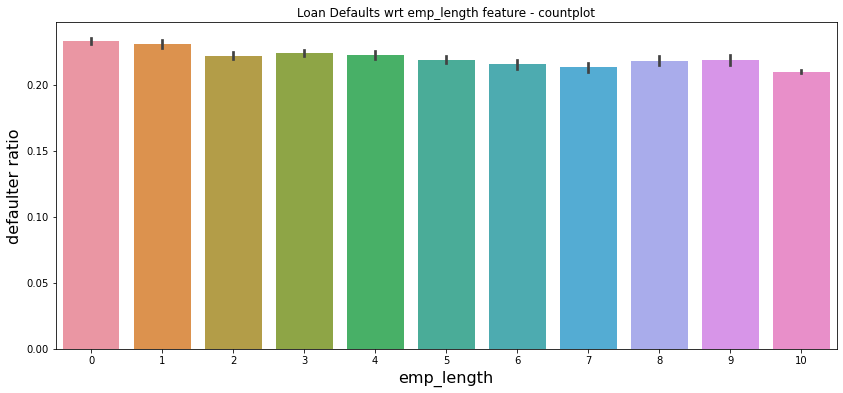

In [56]:
# check for defaulters wrt emp_length in the data using countplot
plotUnivariateBar("emp_length", figsize=(14,6))

From above plot for ‘emp_length’ we can infer that the defaulters rate is constant here, hence defaulter does not depends on emp_length
### is emp_length benificial --> No

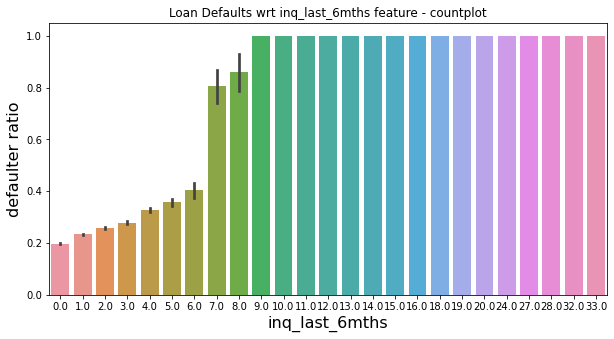

In [58]:
# check for defaulters wrt inq_last_6mths in the data
plotUnivariateBar("inq_last_6mths")


From above plot for ‘inq_last_6mths’ we can infer that the defaulters rate is consistently increasing with inq_last_6mths type, hence not useful
### is inq_last_6mths benificial --> Yes

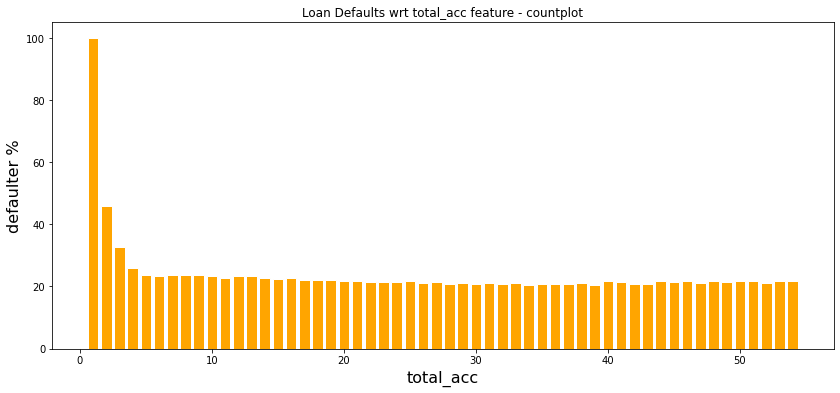

In [63]:
# check for defaulters wrt total_acc in the data using countplot
plotUnivariateRatioBar("total_acc", figsize=(14,6))

From above plot for ‘total_acc’ we can infer that the defaulters rate is not constant for all total_acc values, hence rate will depend on total_acc feature, more the features relatively lesser the default rate
### is total_acc benificial --> Yes

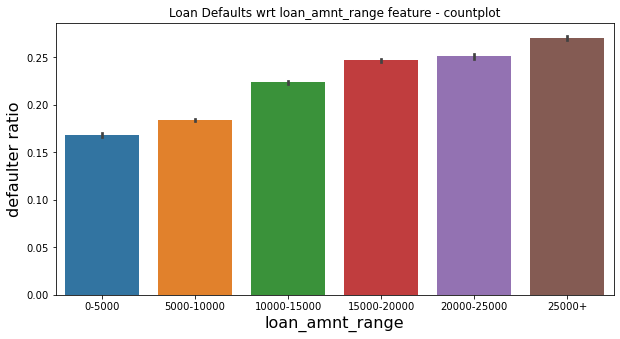

In [64]:
# check for defaulters wrt loan_amnt_range in the data using countplot
plotUnivariateBar("loan_amnt_range")

From above plot for ‘loan_amnt_range’ we can infer that the defaulters rate is increasing loan_amnt_range values, hence rate will depend on loan_amnt_range feature
### is loan_amnt_range benificial -> Yes

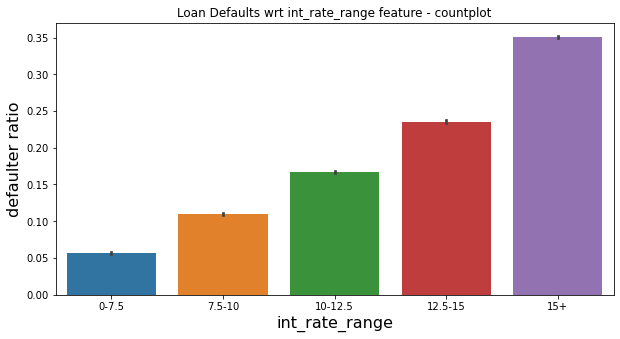

In [65]:
# check for defaulters wrt int_rate_range in the data
plotUnivariateBar("int_rate_range")

From above plot for ‘int_rate_range’ we can infer that the defaulters rate is decreasing with int_rate_range values, hence rate will depend on int_rate_range feature
### is int_rate_range benificial --> Yes

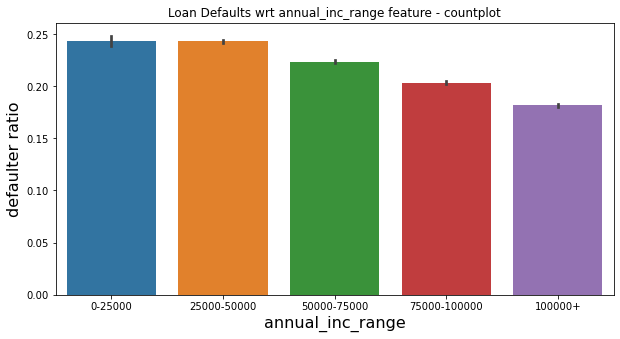

In [66]:
# check for defaulters wrt annual_inc_range in the data
plotUnivariateBar("annual_inc_range")

From above plot for ‘annual_inc_range’ we can infer that the defaulters rate is decreasing as with annual_inc_range values, hence rate will depend on annual_inc_range feature
### is annual_inc_range benificial -> Yes

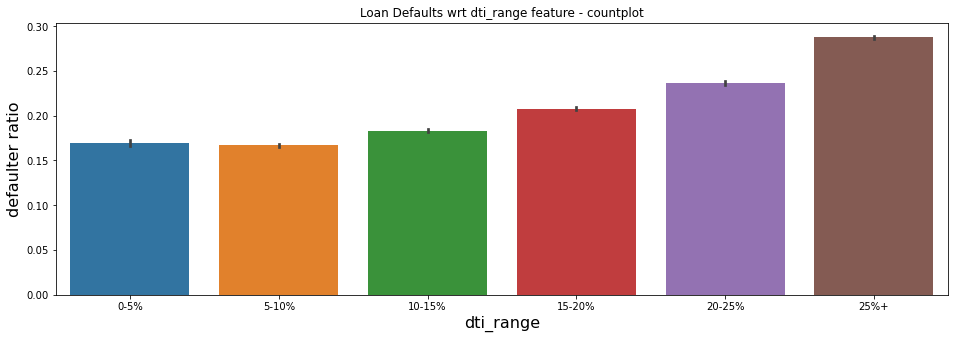

In [67]:
# check for defaulters wrt dti_range in the data using countplot
plotUnivariateBar("dti_range", figsize=(16,5))

From above plot for ‘dti_range’ we can infer that the defaulters rate is increasing as with dti_range values, hence rate will depend on dti_range feature
### is dti_range benificial -> Yes

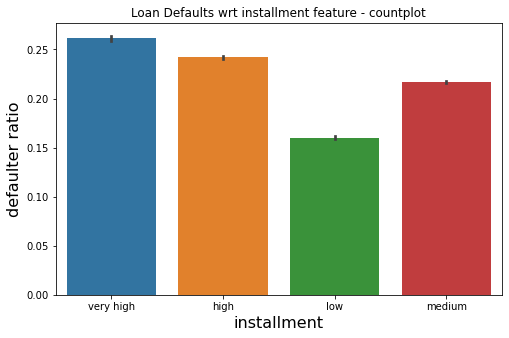

In [69]:
#check for defaulters wrt installment range in the data
plotUnivariateBar("installment", figsize=(8,5))


From above plot for ‘installment’ we can infer that the defaulters rate is increasing as with installment values, hence rate will depend on dti_range feature
### is installment benificial --> Yes

THerefore following are the metrics that are important to look at when taking into account the default rate 
### Categorical
<b> term, grade, sub_grade, purpose</b>
### Continuous
<b>inq_last_6mths benificial, total_acc, loan_amnt_range, int_rate_range, annual_inc_range, dti_range, installment</b>

## Multivariat Analysis(Corr)

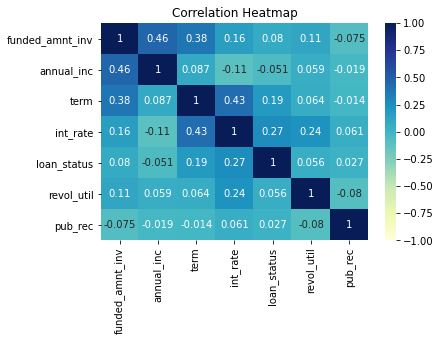

In [70]:
# plot heat map to see correlation between features
continuous_f = ["funded_amnt_inv", "annual_inc", "term", "int_rate", "loan_status", "revol_util", "pub_rec", "earliest_cr_line"]
loan_corr = loan[continuous_f].corr()
sns.heatmap(loan_corr,vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

Hence, important related feature from above Multivariate analysis are:
<b>term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv</b>

## Bivariate Analysis

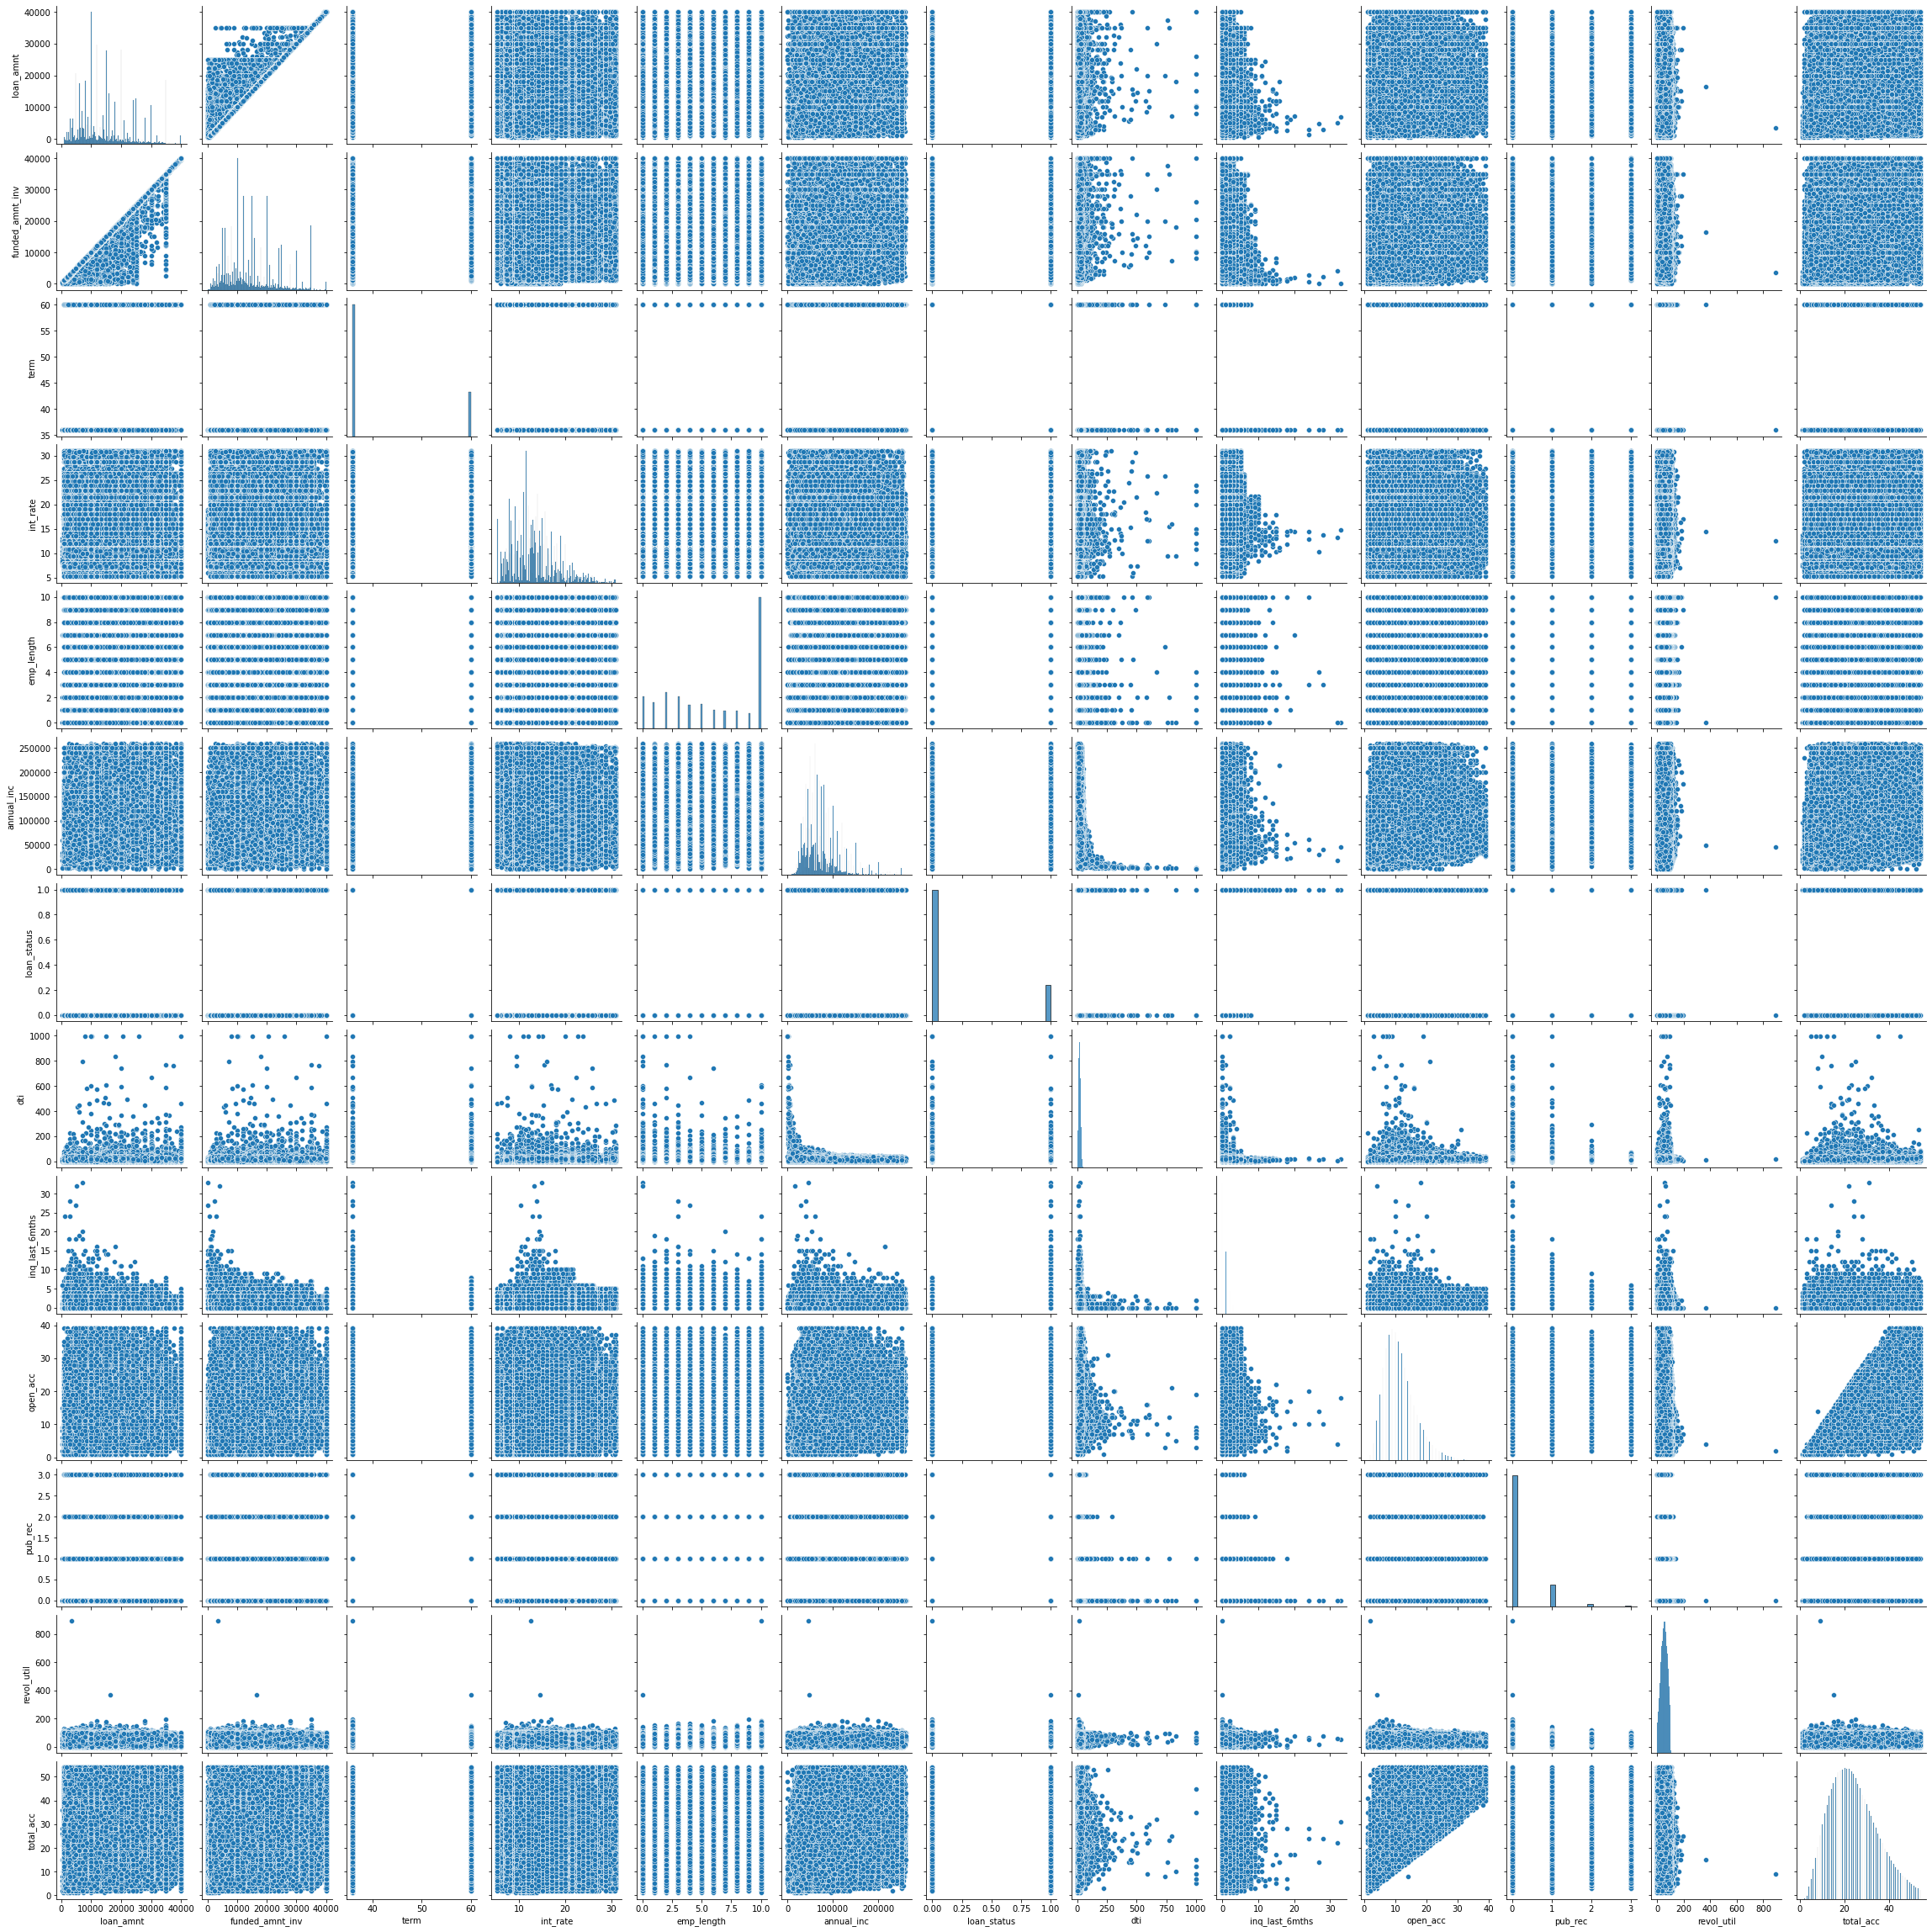

In [71]:
sns.pairplot(loan)

Therefore, following are the important feature we deduced from above Bivariate analysis:
<b>term, grade, purpose, pub_rec, revol_util, funded_amnt_inv, int_rate, annual_inc, installment</b>


# Final Findings
After analysing all the related features available in the dataset, we have come to an end, deducing the main driving features for the data set are 
<b>term, grade, purpose, revol_util, int_rate, installment, annual_inc, funded_amnt_inv</b> when it comes to defaulting 
